# Airbnb price prediction

In [245]:
import pandas as pd
import numpy as np
data= pd.read_csv('train.csv')
data.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [246]:
data.shape

(74111, 29)

In [247]:
data.describe(include=['O'])


,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


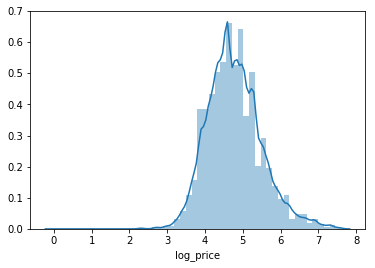

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
x= data.iloc[:,1]
sns.distplot(x);

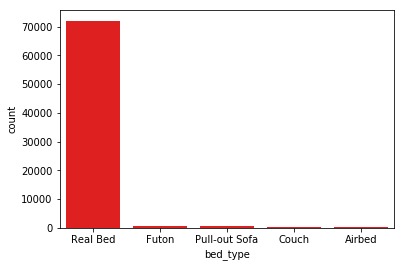

In [249]:
sns.countplot(x='bed_type',color='red', data=data)

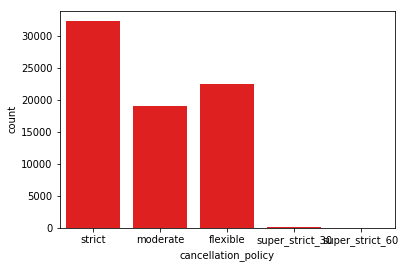

In [250]:
sns.countplot(x='cancellation_policy',color='red', data=data)

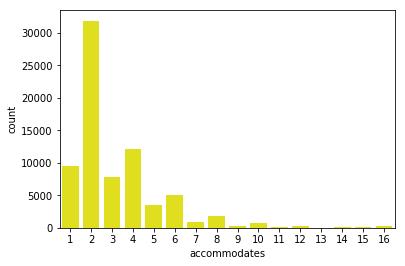

In [251]:
sns.countplot(x='accommodates',color='yellow', data=data)

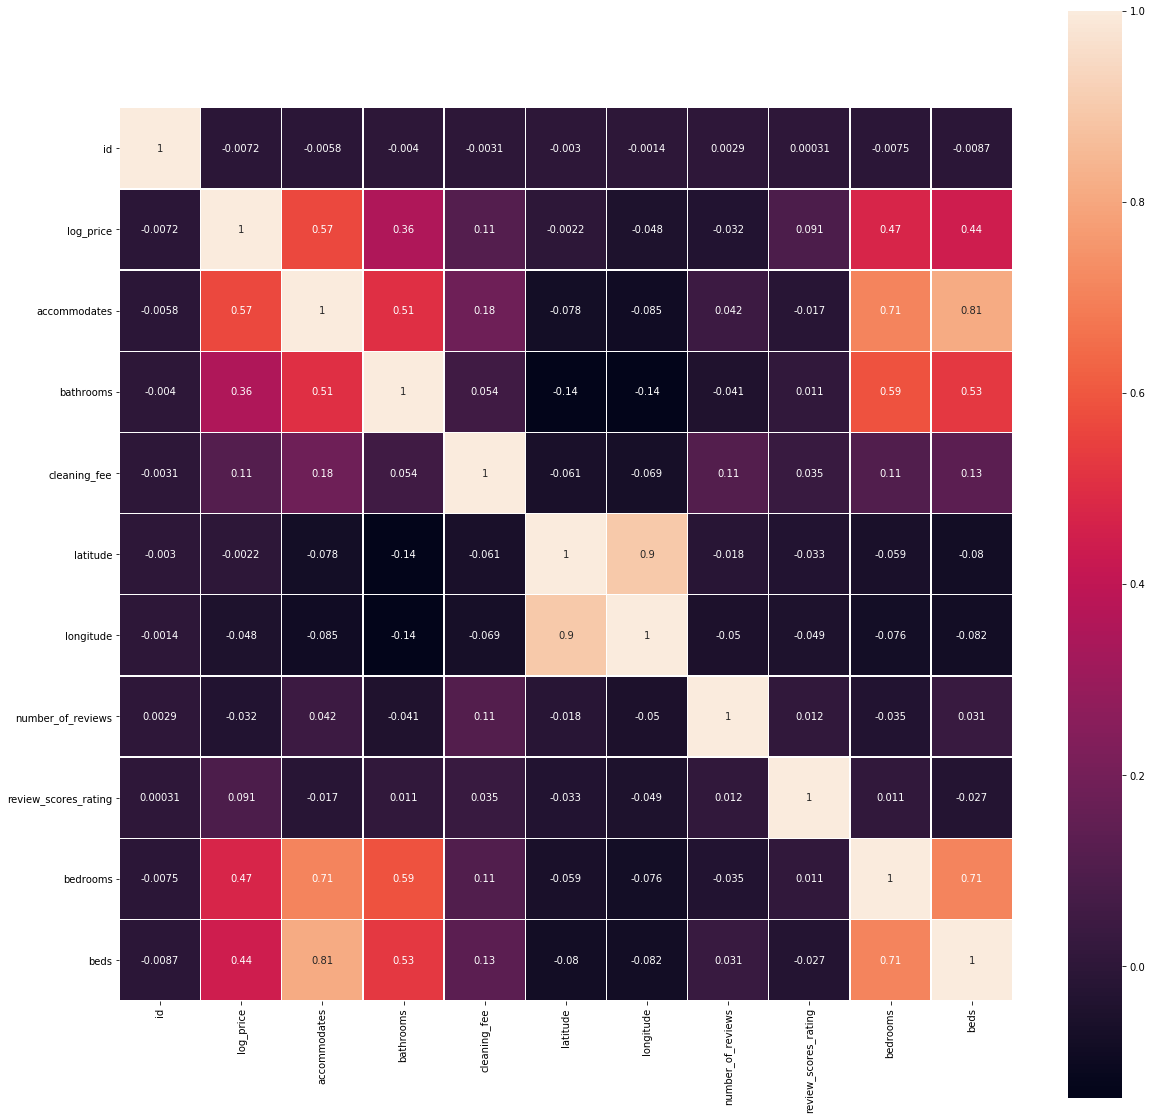

In [252]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),linewidths=0.25, square=True, 
    linecolor='w',annot=True)

In [253]:
filedata=data
filedata=filedata.drop(['id','number_of_reviews','review_scores_rating','latitude',
       'longitude' ], axis=1)


In [254]:
filedata=filedata.drop(['bathrooms','bedrooms','beds'], axis=1)


In [255]:
for col in filedata:
    if (filedata[col].isnull().any()):
        print(col)

first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
last_review
neighbourhood
thumbnail_url
zipcode


In [256]:
for col in filedata:
    if (filedata[col].isnull().any()):
        filedata=filedata.drop([col],axis=1)
filedata


,log_price,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,instant_bookable,name
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",f,Beautiful brownstone 1-bedroom
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,t,Superb 3BR Apt Located Near Times Square
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,t,The Garden Oasis
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,f,Beautiful Flat in the Heart of SF!
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",t,Great studio in midtown DC
5,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,t,Comfort Suite San Francisco
6,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,Real Bed,moderate,True,LA,Warm and cozy studio with full kitchen and bat...,t,Beach Town Studio and Parking!!!11h
7,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,f,"Near LA Live, Staple's. Starbucks inside. OWN ..."
8,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,f,Cozy Garden Studio - Private Entry
9,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,Real Bed,moderate,True,LA,"Quiet community. Close to supermarkets,restaur...",t,No.7 Queen Size Cozy Room 舒适大床房


In [257]:
filedata['bed_type'].value_counts()

Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: bed_type, dtype: int64

In [258]:
filedata=filedata.drop(['property_type','amenities','description'], axis=1)

In [259]:
def replace_with_ohe(df, cat_columns):
    for col in cat_columns:
        df[col] = pd.Categorical(df[col])
        dum = pd.get_dummies(df[col], prefix=col)
        df=pd.concat([df, dum], axis=1)
    df = df.drop(cat_columns, axis=1)
    return df

In [260]:
filedata = replace_with_ohe(filedata, ['room_type', 'bed_type', 'cancellation_policy', 'city'])
list(filedata.columns)

['log_price',
 'accommodates',
 'cleaning_fee',
 'instant_bookable',
 'name',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'cancellation_policy_super_strict_30',
 'cancellation_policy_super_strict_60',
 'city_Boston',
 'city_Chicago',
 'city_DC',
 'city_LA',
 'city_NYC',
 'city_SF']

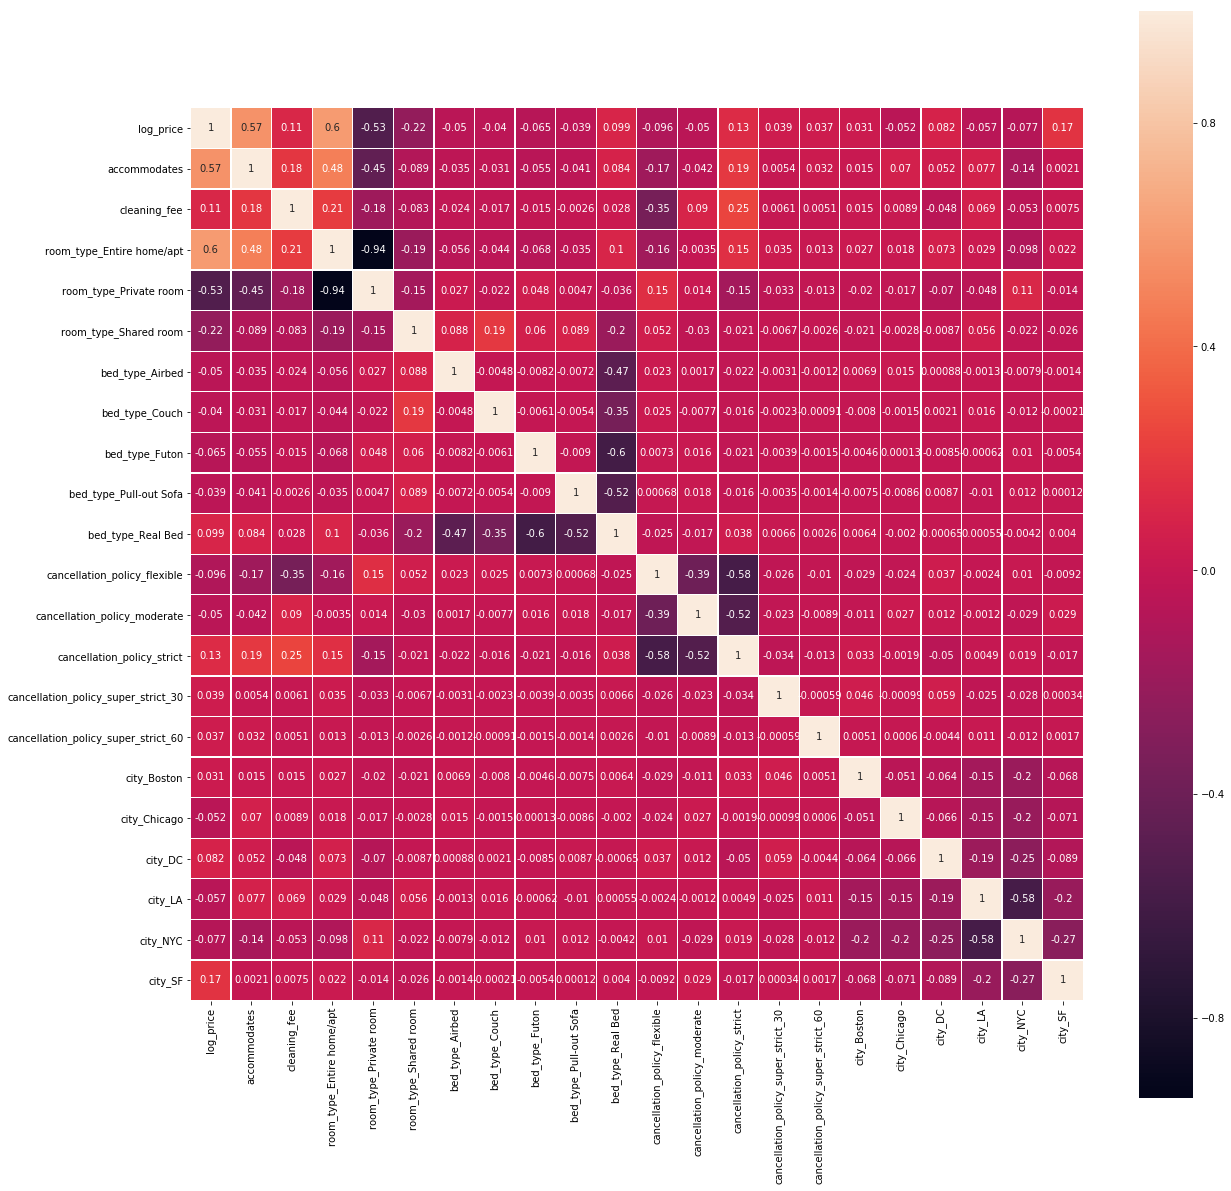

In [261]:
plt.figure(figsize=(20,20))
sns.heatmap(filedata.corr(),linewidths=0.25, square=True, 
    linecolor='w',annot=True)

In [262]:
filedata['instant_bookable'] = (filedata['instant_bookable'] == 't').astype(int)
filedata['instant_bookable']

0        0
1        1
2        1
3        0
4        1
5        1
6        1
7        0
8        0
9        1
10       0
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       1
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
74081    1
74082    0
74083    0
74084    0
74085    0
74086    0
74087    1
74088    0
74089    0
74090    0
74091    0
74092    1
74093    0
74094    0
74095    0
74096    0
74097    1
74098    0
74099    1
74100    0
74101    0
74102    0
74103    0
74104    0
74105    0
74106    0
74107    0
74108    1
74109    1
74110    0
Name: instant_bookable, Length: 74111, dtype: int32

In [263]:
X = filedata.iloc[:,1:].drop(['name'], axis=1)

In [264]:
Y = filedata['log_price']

In [265]:
X

,accommodates,cleaning_fee,instant_bookable,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3,True,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,7,True,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,5,True,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,True,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,2,True,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,3,True,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,2,True,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,2,True,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,2,True,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [266]:
Y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
5        4.442651
6        4.418841
7        4.787492
8        4.787492
9        3.583519
10       4.605170
11       5.010635
12       4.248495
13       5.298317
14       4.955827
15       4.094345
16       4.317488
17       4.595120
18       4.882802
19       4.595120
20       4.382027
21       3.688879
22       4.905275
23       4.007333
24       6.956545
25       5.003946
26       4.553877
27       5.003946
28       5.192957
29       4.653960
           ...   
74081    6.907755
74082    4.174387
74083    5.010635
74084    5.843544
74085    4.653960
74086    4.174387
74087    4.477337
74088    4.905275
74089    4.605170
74090    4.317488
74091    5.010635
74092    4.700480
74093    4.948760
74094    3.688879
74095    4.382027
74096    3.912023
74097    4.700480
74098    4.553877
74099    4.276666
74100    4.605170
74101    4.584967
74102    4.110874
74103    5.135798
74104    4.356709
74105    4

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [269]:
X_train

,accommodates,cleaning_fee,instant_bookable,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
41760,4,True,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8129,5,True,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
72480,2,True,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
66899,4,True,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
66427,6,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35767,1,False,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
68649,1,False,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26845,4,True,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3444,2,True,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
14663,2,True,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## Linear Regression

In [270]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)
print("accuracy= ",lg.score(X_test, Y_test))

accuracy=  0.5176300061625837


## Random forest regression

In [271]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
print("accuracy= ",rf.score(X_test, Y_test))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy=  0.5266664743579167
